In [25]:
import os 
import kagglehub
import pandas as pd

RANDOM_STATE = 555

# Download latest version
path = kagglehub.dataset_download("miguelcorraljr/ted-ultimate-dataset")

print("Path to dataset files:", path)
en_datapath = os.path.join(path ,"2020-05-01", "ted_talks_en.csv")
df = pd.read_csv(en_datapath)

Path to dataset files: /Users/wiwatp/.cache/kagglehub/datasets/miguelcorraljr/ted-ultimate-dataset/versions/2


[]

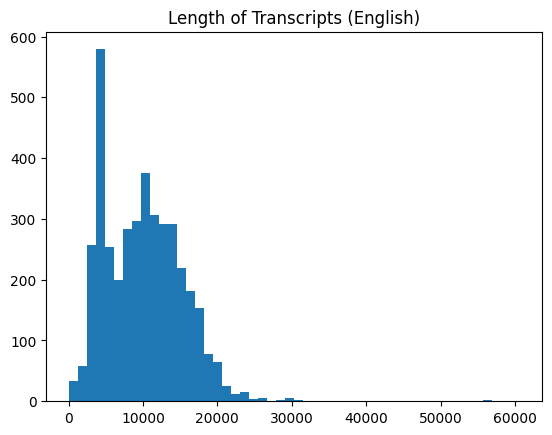

In [7]:
df['transcript_length'] = df['transcript'].apply(len)

import matplotlib.pyplot as plt

plt.hist(df['transcript_length'], bins=50)
plt.title("Length of Transcripts (English)")
plt.plot()

In [8]:
df.head()

,talk_id,title,speaker_1,all_speakers,occupations,about_speakers,views,recorded_date,published_date,event,native_lang,available_lang,comments,duration,topics,related_talks,url,description,transcript,transcript_length
0,1,Averting the climate crisis,Al Gore,{0: 'Al Gore'},{0: ['climate advocate']},{0: 'Nobel Laureate Al Gore focused the world’...,3523392,2006-02-25,2006-06-27,TED2006,en,"['ar', 'bg', 'cs', 'de', 'el', 'en', 'es', 'fa...",272.0,977,"['alternative energy', 'cars', 'climate change...","{243: 'New thinking on the climate crisis', 54...",https://www.ted.com/talks/al_gore_averting_the...,With the same humor and humanity he exuded in ...,"Thank you so much, Chris. And it's truly a gre...",11878
1,92,The best stats you've ever seen,Hans Rosling,{0: 'Hans Rosling'},{0: ['global health expert; data visionary']},"{0: 'In Hans Rosling’s hands, data sings. Glob...",14501685,2006-02-22,2006-06-27,TED2006,en,"['ar', 'az', 'bg', 'bn', 'bs', 'cs', 'da', 'de...",628.0,1190,"['Africa', 'Asia', 'Google', 'demo', 'economic...","{2056: ""Own your body's data"", 2296: 'A visual...",https://www.ted.com/talks/hans_rosling_the_bes...,You've never seen data presented like this. Wi...,"About 10 years ago, I took on the task to teac...",17453
2,7,Simplicity sells,David Pogue,{0: 'David Pogue'},{0: ['technology columnist']},{0: 'David Pogue is the personal technology co...,1920832,2006-02-24,2006-06-27,TED2006,en,"['ar', 'bg', 'de', 'el', 'en', 'es', 'fa', 'fr...",124.0,1286,"['computers', 'entertainment', 'interface desi...","{1725: '10 top time-saving tech tips', 2274: '...",https://www.ted.com/talks/david_pogue_simplici...,New York Times columnist David Pogue takes aim...,"(Music: ""The Sound of Silence,"" Simon & Garfun...",18427
3,53,Greening the ghetto,Majora Carter,{0: 'Majora Carter'},{0: ['activist for environmental justice']},{0: 'Majora Carter redefined the field of envi...,2664069,2006-02-26,2006-06-27,TED2006,en,"['ar', 'bg', 'bn', 'ca', 'cs', 'de', 'en', 'es...",219.0,1116,"['MacArthur grant', 'activism', 'business', 'c...",{1041: '3 stories of local eco-entrepreneurshi...,https://www.ted.com/talks/majora_carter_greeni...,"In an emotionally charged talk, MacArthur-winn...",If you're here today — and I'm very happy that...,18305
4,66,Do schools kill creativity?,Sir Ken Robinson,{0: 'Sir Ken Robinson'},"{0: ['author', 'educator']}","{0: ""Creativity expert Sir Ken Robinson challe...",65051954,2006-02-25,2006-06-27,TED2006,en,"['af', 'ar', 'az', 'be', 'bg', 'bn', 'ca', 'cs...",4931.0,1164,"['children', 'creativity', 'culture', 'dance',...","{865: 'Bring on the learning revolution!', 173...",https://www.ted.com/talks/sir_ken_robinson_do_...,Sir Ken Robinson makes an entertaining and pro...,Good morning. How are you? (Audience) Good. It...,17558


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4005 entries, 0 to 4004
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   talk_id            4005 non-null   int64  
 1   title              4005 non-null   object 
 2   speaker_1          4005 non-null   object 
 3   all_speakers       4001 non-null   object 
 4   occupations        3483 non-null   object 
 5   about_speakers     3502 non-null   object 
 6   views              4005 non-null   int64  
 7   recorded_date      4004 non-null   object 
 8   published_date     4005 non-null   object 
 9   event              4005 non-null   object 
 10  native_lang        4005 non-null   object 
 11  available_lang     4005 non-null   object 
 12  comments           3350 non-null   float64
 13  duration           4005 non-null   int64  
 14  topics             4005 non-null   object 
 15  related_talks      4005 non-null   object 
 16  url                4005 

In [10]:
unused_columns = ['talk_id',
                  'title',
                  'speaker_1',
                  'all_speakers',
                  'occupations',
                  'about_speakers',
                  'views',
                  'recorded_date',
                  'published_date',
                  'event',
                  'duration',
                  'topics',
                  'related_talks',
                  'url']

df.drop(columns=unused_columns, inplace=True, errors='ignore'  )

In [11]:
import spacy

nlp = spacy.load('en_core_web_lg')

def process_text(text):
    doc = nlp(text[:1000])
    return [token.lemma_ for token in doc if not token.is_stop and not token.is_punct]

df['processed'] = df['transcript'].apply(process_text)

In [12]:
df['processed_join'] = df['processed'].apply(lambda x:' '.join(x))


In [13]:
if not os.path.exists('dataset'):   
    os.makedirs('dataset')
    
# create corpus.tsv
df[['processed_join']].to_csv(os.path.join('dataset', 'corpus.tsv'), sep='\t', index=False, header=False)
# create vocabulary.txt
# with open(os.path.join('dataset', 'vocabulary.txt'), 'w') as f:
#     for token in df['processed'].explode().unique():
#         f.write(f"{token}\n")

In [14]:
from octis.dataset.dataset import Dataset

dataset = Dataset() 
dataset.load_custom_dataset_from_folder(path='dataset') 


In [15]:
from octis.models.LDA import LDA
lda = LDA(random_state=RANDOM_STATE)
lda_model = lda.train_model(dataset)


In [16]:
lda_model['topics']

[['brave',
  'Grand',
  'act',
  'state',
  'late',
  'service',
  'Alabama',
  'century',
  'spring',
  'play'],
 ['brain',
  'know',
  'like',
  'object',
  'go',
  'time',
  'right',
  'let',
  'year',
  'human'],
 ['test',
  'population',
  'multiply',
  'attention',
  'ability',
  'assess',
  'design',
  'result',
  'basis',
  'divide'],
 ['blood',
  'plant',
  'creature',
  'process',
  'chamber',
  'tall',
  'mistake',
  'live',
  'come',
  'like'],
 ['like',
  'people',
  'go',
  'world',
  'family',
  'time',
  'know',
  'pirate',
  'thing',
  'Yale'],
 ['car',
  'district',
  'attorney',
  'permanently',
  'charge',
  'order',
  'file',
  'general',
  'find',
  'answer'],
 ['gradual',
  'Alabama',
  'fight',
  'scorn',
  'bear',
  'sell',
  'spring',
  '♫',
  'power',
  'York'],
 ['atom',
  'story',
  'know',
  'time',
  'tell',
  '♫',
  'year',
  'small',
  'comic',
  'butterfly'],
 ['physics',
  'satellite',
  'Newton',
  'Earth',
  'intersection',
  'time',
  'like',
  'ga

In [17]:
from octis.models.NMF import NMF


nmf = NMF(random_state=RANDOM_STATE) 
nmf_model = nmf.train_model(dataset)

In [18]:
print(nmf_model['topics'])

[['come', 'human', 'laughter', 'system', 'different', 'hand', 'world', 'sleep', 'idea', 'water'], ['planet', 'girl', 'dog', 'design', 'star', 'light', 'think', 'Earth', 'work', 'boy'], ['♪', 'blah', 'new', 'behavior', 'music', 'light', 'animal', 'oh', 'night', 'girl'], ['♫', 'want', 'know', 'thing', 'world', 'look', 'everybody', 'time', 'get', 'change'], ['year', 'like', 'billion', 'planet', 'plant', 'come', 'minute', 'understand', 'New', 'life'], ['♪', 'come', 'information', 'call', 'fact', 'fly', 'mammal', 'time', 'track', 'second'], ['think', 'like', 'space', 'design', 'way', 'talk', 'come', 'sort', 'mean', 'happiness'], ['planet', 'phone', 'technology', 'mobile', 'live', 'power', 'future', 'Earth', 'wave', 'universe'], ['world', 'live', 'country', 'want', 'China', 'journey', 'long', 'story', 'map', 'build'], ['brain', 'da', 'yeah', 'body', '♪', 'want', 'tell', 'human', 'say', 'hand'], ['people', 'city', 'today', 'million', 'number', 'insect', 'create', 'specie', 'right', 'take'], [

In [19]:
from octis.evaluation_metrics.coherence_metrics import Coherence

coherence_model = Coherence(measure="c_v")
lda_coherence = coherence_model.score(lda_model)
print(f"LDA Coherence Score: {lda_coherence}")


nmf_coherence = coherence_model.score(nmf_model)
print(f"NMF Coherence Score: {nmf_coherence}")


umass_model = Coherence(measure="u_mass")
lda_coherence = umass_model.score(lda_model)
print(f"LDA U-Mass Score: {lda_coherence}")

nmf_coherence = umass_model.score(nmf_model)
print(f"NMF U-Mass Score: {nmf_coherence}")

LDA Coherence Score: 0.5065803754895994
NMF Coherence Score: 0.4873868343908957


/opt/anaconda3/envs/nlp_project/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/anaconda3/envs/nlp_project/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


LDA U-Mass Score: nan
NMF U-Mass Score: -2.2397111666826803


In [43]:
from octis.optimization.optimizer import Optimizer
from skopt.space.space import Real, Integer

search_space = {"num_topics": Integer(5, 20),
                "alpha": Real(0.01, 1.0, "log-uniform"),
                "eta": Real(0.01, 1.0, "log-uniform"),}

optimizer = Optimizer()
eval_metrics = Coherence(texts=dataset.get_corpus(), measure="c_v")

if not os.path.exists('results'):   
    os.makedirs('results')
    
optimize_result = optimizer.optimize(LDA(random_state=RANDOM_STATE), 
                                     dataset, 
                                     eval_metrics, 
                                     search_space, 
                                    save_path='results',
                                    number_of_call=20,
                                    model_runs=5)
optimize_result.save_to_csv("result.csv")

Current call:  0
Current call:  1
Current call:  2
Current call:  3
Current call:  4
Current call:  5
Current call:  6
Current call:  7
Current call:  8
Current call:  9
Current call:  10
Current call:  11
Current call:  12
Current call:  13
Current call:  14
Current call:  15
Current call:  16
Current call:  17
Current call:  18
Current call:  19


In [27]:
from octis.optimization.optimizer import Optimizer
from skopt.space.space import Real, Integer

search_space = {"num_topics": Integer(3, 20)}
optimizer = Optimizer()
eval_metrics = Coherence(texts=dataset.get_corpus(), measure="c_v")

if not os.path.exists('results'):   
    os.makedirs('results')
    
optimize_result = optimizer.optimize(NMF(random_state=RANDOM_STATE), 
                                     dataset, 
                                     eval_metrics, 
                                     search_space, 
                                    save_path='results',
                                    number_of_call=10,
                                    model_runs=3)
optimize_result.save_to_csv("nmf_result.csv")

Current call:  0
Current call:  1
Current call:  2
Current call:  3
Current call:  4
Current call:  5


/opt/anaconda3/envs/nlp_project/lib/python3.10/site-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [11] before, using random point [19]
  warnings.warn(


Current call:  6
Current call:  7
Current call:  8
Current call:  9


/opt/anaconda3/envs/nlp_project/lib/python3.10/site-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [13] before, using random point [8]
  warnings.warn(


In [35]:
from octis.optimization.optimizer import Optimizer
from skopt.space.space import Real, Integer
from octis.models.ETM import ETM

search_space = {"num_topics": Integer(3, 20)}
optimizer = Optimizer()
eval_metrics = Coherence(texts=dataset.get_corpus(), measure="c_v")

if not os.path.exists('results'):   
    os.makedirs('results')
    
optimize_result = optimizer.optimize(ETM(use_partitions=False), 
                                     dataset, 
                                     eval_metrics, 
                                     search_space, 
                                    save_path='results',
                                    number_of_call=10,
                                    model_runs=3)
optimize_result.save_to_csv("etm_result.csv")

Current call:  0


/opt/anaconda3/envs/nlp_project/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:1320: UserWarning: Upper case characters found in vocabulary while 'lowercase' is True. These entries will not be matched with any documents
  warnings.warn(


model: ETM(
  (t_drop): Dropout(p=0.5, inplace=False)
  (theta_act): ReLU()
  (rho): Linear(in_features=300, out_features=24853, bias=False)
  (alphas): Linear(in_features=300, out_features=11, bias=False)
  (q_theta): Sequential(
    (0): Linear(in_features=24853, out_features=800, bias=True)
    (1): ReLU()
    (2): Linear(in_features=800, out_features=800, bias=True)
    (3): ReLU()
  )
  (mu_q_theta): Linear(in_features=800, out_features=11, bias=True)
  (logsigma_q_theta): Linear(in_features=800, out_features=11, bias=True)
)
Epoch: 1 .. batch: 20/32 .. LR: 0.005 .. KL_theta: 0.12 .. Rec_loss: 657.52 .. NELBO: 657.64
****************************************************************************************************
Epoch----->1 .. LR: 0.005 .. KL_theta: 0.08 .. Rec_loss: 647.68 .. NELBO: 647.76
****************************************************************************************************
Epoch: 2 .. batch: 20/32 .. LR: 0.005 .. KL_theta: 0.03 .. Rec_loss: 561.74 .. NELBO: 5

/opt/anaconda3/envs/nlp_project/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:1320: UserWarning: Upper case characters found in vocabulary while 'lowercase' is True. These entries will not be matched with any documents
  warnings.warn(


model: ETM(
  (t_drop): Dropout(p=0.5, inplace=False)
  (theta_act): ReLU()
  (rho): Linear(in_features=300, out_features=24853, bias=False)
  (alphas): Linear(in_features=300, out_features=11, bias=False)
  (q_theta): Sequential(
    (0): Linear(in_features=24853, out_features=800, bias=True)
    (1): ReLU()
    (2): Linear(in_features=800, out_features=800, bias=True)
    (3): ReLU()
  )
  (mu_q_theta): Linear(in_features=800, out_features=11, bias=True)
  (logsigma_q_theta): Linear(in_features=800, out_features=11, bias=True)
)
Epoch: 1 .. batch: 20/32 .. LR: 0.005 .. KL_theta: 0.09 .. Rec_loss: 658.32 .. NELBO: 658.41
****************************************************************************************************
Epoch----->1 .. LR: 0.005 .. KL_theta: 0.07 .. Rec_loss: 648.13 .. NELBO: 648.2
****************************************************************************************************
Epoch: 2 .. batch: 20/32 .. LR: 0.005 .. KL_theta: 0.07 .. Rec_loss: 561.72 .. NELBO: 56

KeyboardInterrupt: 

In [ ]:
etm = ETM(use_partitions=False)
etm_model = etm.train_model(dataset)
etm_model['topics']

/opt/anaconda3/envs/nlp_project/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:1320: UserWarning: Upper case characters found in vocabulary while 'lowercase' is True. These entries will not be matched with any documents
  warnings.warn(


model: ETM(
  (t_drop): Dropout(p=0.5, inplace=False)
  (theta_act): ReLU()
  (rho): Linear(in_features=300, out_features=24853, bias=False)
  (alphas): Linear(in_features=300, out_features=10, bias=False)
  (q_theta): Sequential(
    (0): Linear(in_features=24853, out_features=800, bias=True)
    (1): ReLU()
    (2): Linear(in_features=800, out_features=800, bias=True)
    (3): ReLU()
  )
  (mu_q_theta): Linear(in_features=800, out_features=10, bias=True)
  (logsigma_q_theta): Linear(in_features=800, out_features=10, bias=True)
)
Epoch: 1 .. batch: 20/32 .. LR: 0.005 .. KL_theta: 0.02 .. Rec_loss: 657.33 .. NELBO: 657.35
****************************************************************************************************
Epoch----->1 .. LR: 0.005 .. KL_theta: 0.01 .. Rec_loss: 647.57 .. NELBO: 647.58
****************************************************************************************************
Epoch: 2 .. batch: 20/32 .. LR: 0.005 .. KL_theta: 0.01 .. Rec_loss: 561.75 .. NELBO: 5

[['like',
  'year',
  'people',
  'know',
  'time',
  'think',
  'go',
  'laughter',
  'work',
  'life'],
 ['like',
  'year',
  'people',
  'know',
  'time',
  'go',
  'think',
  'laughter',
  'world',
  'life'],
 ['like',
  'people',
  'year',
  'know',
  'time',
  'go',
  'think',
  'laughter',
  'life',
  'work'],
 ['like',
  'people',
  'year',
  'know',
  'time',
  'think',
  'go',
  'world',
  'laughter',
  'life'],
 ['like',
  'people',
  'year',
  'know',
  'time',
  'think',
  'go',
  'laughter',
  'world',
  'work'],
 ['like',
  'people',
  'year',
  'know',
  'time',
  'go',
  'think',
  'work',
  'laughter',
  'world'],
 ['like',
  'year',
  'people',
  'know',
  'time',
  'go',
  'think',
  'life',
  'work',
  'laughter'],
 ['like',
  'people',
  'year',
  'know',
  'time',
  'think',
  'go',
  'laughter',
  'life',
  'work'],
 ['like',
  'year',
  'people',
  'know',
  'time',
  'go',
  'think',
  'laughter',
  'life',
  'work'],
 ['like',
  'year',
  'people',
  'know',


In [41]:
coherence_model = Coherence(measure="c_v")
etm_coherence = coherence_model.score(etm_model)
print(f"ETM Coherence Score: {etm_coherence}")

print(etm_model['topics'])


ETM Coherence Score: 0.5501886346578144
[['like', 'year', 'people', 'know', 'time', 'think', 'go', 'laughter', 'work', 'life'], ['like', 'year', 'people', 'know', 'time', 'go', 'think', 'laughter', 'world', 'life'], ['like', 'people', 'year', 'know', 'time', 'go', 'think', 'laughter', 'life', 'work'], ['like', 'people', 'year', 'know', 'time', 'think', 'go', 'world', 'laughter', 'life'], ['like', 'people', 'year', 'know', 'time', 'think', 'go', 'laughter', 'world', 'work'], ['like', 'people', 'year', 'know', 'time', 'go', 'think', 'work', 'laughter', 'world'], ['like', 'year', 'people', 'know', 'time', 'go', 'think', 'life', 'work', 'laughter'], ['like', 'people', 'year', 'know', 'time', 'think', 'go', 'laughter', 'life', 'work'], ['like', 'year', 'people', 'know', 'time', 'go', 'think', 'laughter', 'life', 'work'], ['like', 'year', 'people', 'know', 'time', 'go', 'think', 'life', 'laughter', 'world']]
